In [31]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

In [32]:
def shear(r):
    return np.exp(-r**2)

In [33]:
shear(0)

1.0

In [34]:
def r(theta, theta_off, phi):
    a = theta**2 + theta_off**2 - 2*theta*theta_off*np.cos(phi)
    return np.sqrt(a)

In [35]:
def phi_RT(theta, theta_off, phi):
    a = theta*np.sin(phi)
    b = np.sqrt((theta_off + theta*np.cos(phi))**2)
    tan = a/b
    return np.arctan(tan)

In [36]:
def cross_shear(theta, theta_off):
    res = []
    for theta_ in theta:
        def __integrand__(x):
            R = r(theta_, theta_off, x)
            ST = shear(R)
            phi_RT_ = phi_RT(theta_, theta_off, x)
            return -ST*np.sin(2*(x-phi_RT_))
        res.append(quad(__integrand__, 0., 2*np.pi)[0]/(2*np.pi))
    return np.array(res)

In [37]:
def tangential_shear(theta, theta_off):
    res = []
    for theta_ in theta:
        def __integrand__(x):
            R = r(theta_, theta_off, x)
            ST = shear(R)
            phi_RT_ = phi_RT(theta_, theta_off, x)
            return -ST*np.cos(2*(x-phi_RT_))
        res.append(quad(__integrand__, -np.pi, np.pi)[0]/(2*np.pi))
    return np.array(res)

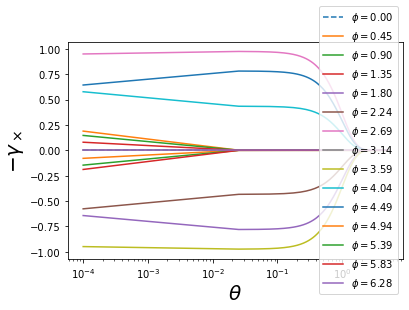

In [54]:
theta_off = 0.00001
theta = np.linspace(0.0001, 5, 200)
phi = np.linspace(0, 2*np.pi, 15)
for i, phi_ in enumerate(phi):
    def cross_shear_at_phi(phi):
            R = r(theta, theta_off, phi)
            ST = shear(R)
            phi_RT_ = phi_RT(theta, theta_off, phi)
            return -ST*np.sin(2*(phi-phi_RT_))
    y = cross_shear_at_phi(phi_)
    linestyle = '-'
    if i == 0: linestyle = '--'
    plt.plot(theta, y, linestyle, label = r'$\phi = $' + f'{phi_:.2f}')
plt.xlabel(r'$\theta$', fontsize = 20)
plt.xscale('log')
plt.ylabel(r'$-\gamma_\times$', fontsize = 20)
plt.legend(loc = 'right')

In [51]:
for i, theta_off_ in enumerate(theta_off):
    y = tangential_shear(theta, theta_off_)
    linestyle = '-'
    if i == 0: linestyle = '--'
    plt.plot(theta, -y, linestyle, label = r'$\theta_{off} = $' + f'{theta_off_:.2f}')
plt.xlabel(r'$\theta$', fontsize = 20)
plt.ylabel(r'$-\gamma_+$', fontsize = 20)
plt.legend()

TypeError: 'float' object is not iterable